# Bidirectional RNN

We already know about LSTM in RNN, how can we further optimize a model like RNN? That's using Bidirectional RNN.

In 1997, Mike Schuster proposed the Bidirectional RNN model. These two models greatly improve the early RNN structure, broaden the application range of RNN, and lay a foundation for the development of subsequent sequence modeling.

## Overview
In the RNN, only the word before the prediction word is considered, that is, only the "above" in the context is considered, and the content after the word is not considered. This may miss some important information, making the content of the forecast less accurate. As in the case of TV shows, when a new character is introduced in the episode, the name of that character cannot be effectively predicted based on the content of previous episodes. But if we watch the later episodes, we might be able to make more effective predictions. Bidirectional RNNS are also based on the idea that they not only keep important information about the words before the word from the front to the back, but also keep important information about the words after the word from the back to the front, and then predict the word based on this important information.
First, let's see the architecture of BRNN cell.

![Bi-RNN1](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/deep-learning/RNN/bi-rnn.png) 

### Code
Here we implement an Bi-RNN model on all a data set of Shakespeare works.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data("imdb.npz", num_words=1000)

Padding is a technique commonly used in natural language processing (NLP) to ensure that all input sequences have the same length. This is often necessary because many NLP models, such as neural networks, require fixed-length input sequences.

In [35]:
max_len = 500
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

Build model

In [36]:
input_dim = 10000
output_dim = 1
# Create the input layer
inputs = tf.keras.Input(shape=(None,), dtype="int32")
 
# Create the model
x = tf.keras.layers.Embedding(input_dim, 128)(inputs)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
outputs = tf.keras.layers.Dense(output_dim, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
 
# Compile the model
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

Train the defined model using the imported data

In [37]:
batch_size = 32
epochs = 4
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/4
782/782 [==============================] - 8842s 11s/step - loss: 0.5259 - accuracy: 0.7423 - val_loss: 0.3913 - val_accuracy: 0.8292
Epoch 2/4
782/782 [==============================] - 4015s 5s/step - loss: 0.3689 - accuracy: 0.8401 - val_loss: 0.3166 - val_accuracy: 0.8691
Epoch 3/4
782/782 [==============================] - 3542s 5s/step - loss: 0.3055 - accuracy: 0.8711 - val_loss: 0.2921 - val_accuracy: 0.8754
Epoch 4/4
782/782 [==============================] - 3748s 5s/step - loss: 0.2743 - accuracy: 0.8861 - val_loss: 0.2830 - val_accuracy: 0.8799


Evaluation accuracy

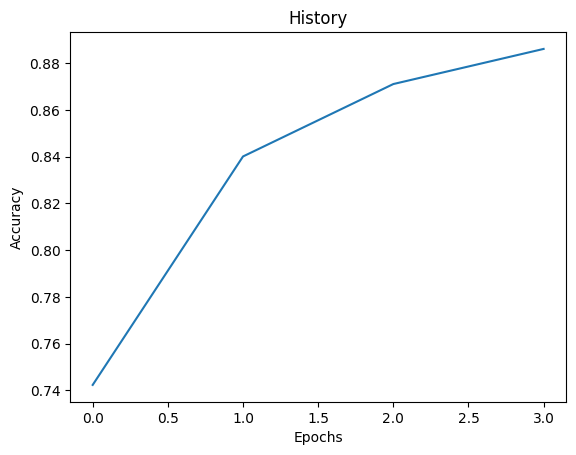

In [38]:
fig = plt.plot(history.history['accuracy'])
title = plt.title("History")
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("Accuracy")

forecast

In [39]:
predictions = model.predict(x_test[:4])
for pred in predictions:
    print(np.argmax(pred[0]))

1/1 [==============================] - 7s 7s/step
0
0
0
0


## Acknowledgments

Thanks to [Xin Hua](https://blog.csdn.net/mzgxinhua/article/details/135172830).It inspires the majority of the content in this chapter.
